<a href="https://colab.research.google.com/github/cclmcesarschool/RNA-e-Deep-Learning---CESAR-School-2023.2/blob/main/Atividade2.4/PyTorch_Variaveis_Gradientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carlos Cezar Lopes de Mendonça

In [ ]:
import torch
from torch.autograd import Variable
import numpy as np

In [ ]:
y_t = 2 * torch.arange(0.,4.)
y = Variable(y_t); y

tensor([0., 2., 4., 6.])

In [ ]:
x = Variable(torch.arange(0.,4.)); x

tensor([0., 1., 2., 3.])

In [ ]:
w = Variable(torch.ones(1),requires_grad=True); w

tensor([1.], requires_grad=True)

In [ ]:
# predict (forward)
y_pred = x * w

# cálculo da perda J: loss
e = y_pred - y
e2 = e.pow(2)
J = e2.sum()
J

tensor(14., grad_fn=<SumBackward0>)

In [ ]:
J.backward()
print(w.grad)

tensor([-28.])


In [ ]:
w.grad.data.zero_();

In [ ]:
eps = 0.001
y_pred = x * (w+eps)
J_new = (y_pred - y).pow(2).sum()
J_new

tensor(13.9720, grad_fn=<SumBackward0>)

In [ ]:
print((J_new - J).data.numpy())

-0.027988434


In [ ]:

dJ = 1.
de2 = dJ * np.ones((4,))
de = de2 * 2 * e.data.numpy()
dy_pred = de
dw = (dy_pred * x.data.numpy()).sum()
print(dJ)
print(de2)
print(de)
print(dw)

1.0
[1. 1. 1. 1.]
[ 0. -2. -4. -6.]
-28.0


In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-0jworioe
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-0jworioe
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

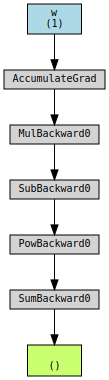

In [ ]:
from torchviz import make_dot, make_dot_from_trace
J = ((w * x) - y).pow(2).sum()
p = {'w':w} # dicionário de parâmetros
out = make_dot(J,params=p)
out

**Por que numa expressão computacional não é possível misturar Variable com tensores?**

**O que acontece com o grafo computacional após execução do backward()**? O Pytorch percorre o grafo computacional no sentido contrario a partir da variável escalar até as variáveis originais, calculando os gradientes ao longo do caminhoO backward destroi o grafo computacional após a sua execução, isso ocorre no Pytorch por ser uma rede dinamica.

1. Execute um passo de atualização do valor de w, pelo gradiente descendente. Utilize um fator de aprendizado () de

0.01  para atualizar o w. Após, recalcule a função de perda:

In [ ]:


# predict (forward)
y_pred = x * w

# cálculo da perda J: loss
e = y_pred - y
e2 = e.pow(2)
J = e2.sum()
J

tensor(14., grad_fn=<SumBackward0>)

In [ ]:
J.backward()
print(w.grad)

tensor([-28.])


In [ ]:
w.grad.data.zero_();

In [ ]:
eps = 0.01
y_pred = x * (w+eps)
J_new = (y_pred - y).pow(2).sum()
J_new

tensor(13.7214, grad_fn=<SumBackward0>)